In [ ]:
Practical 10 : Write Python program to implement CNN object detection. Discuss numerous performance
evaluation metrics for evaluating the object-detecting algorithms' performance.

In [1]:
import torch
import numpy as np
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

Using cache found in C:\Users\Vaishali Pawar/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-4-23 Python-3.12.6 torch-2.6.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\Vaishali Pawar/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


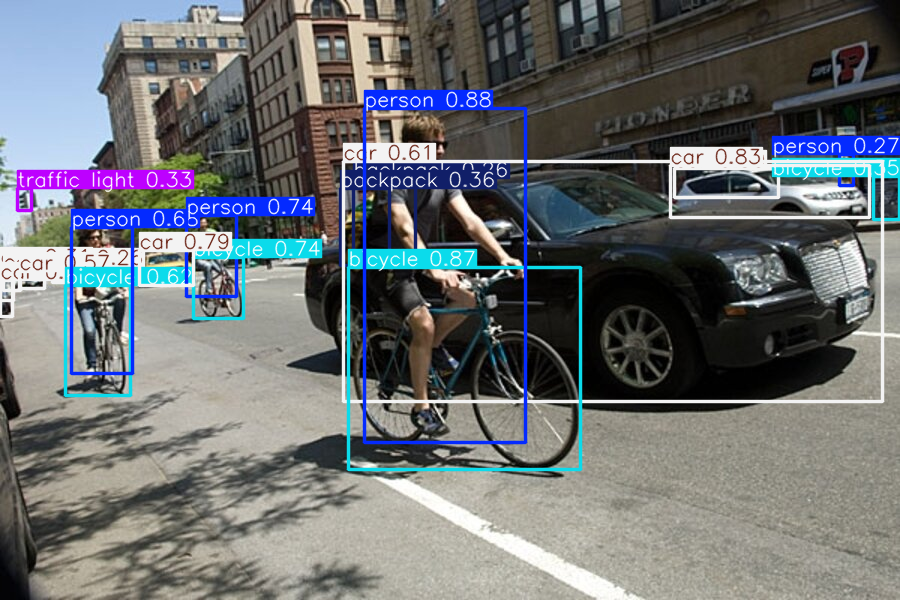

          xmin        ymin        xmax        ymax  confidence  class  \
0   364.677643  108.854507  525.276306  442.310577    0.883269      0   
1   348.318512  267.775757  580.687073  469.598816    0.869130      1   
2   670.888000  165.348724  869.629822  217.867493    0.825909      2   
3   139.270004  250.942062  193.833237  285.345886    0.791673      2   
4   193.809418  257.257172  243.602203  318.394775    0.741890      1   
5   186.534561  215.455582  236.848892  296.861603    0.738160      0   
6    71.007103  227.311829  132.449478  373.117706    0.675442      0   
7    65.076347  285.228973  130.973328  395.495239    0.617867      1   
8   343.834076  161.706177  882.441101  401.424255    0.611398      2   
9    19.442604  271.318390   44.867775  288.362701    0.573373      2   
10    0.000000  280.200745   12.500124  316.457642    0.414277      2   
11  340.948120  188.690262  389.012360  265.559631    0.356162     24   
12  873.692871  176.686356  899.581970  219.510712 

In [2]:
# Load pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Correct repository
model.conf = 0.25  # Set confidence threshold

def detect_objects(image_path):
    """Detect objects in an image using YOLOv5."""
    if not os.path.exists(image_path):
        print(f"Error: Image '{image_path}' not found.")
        return None
    image = Image.open(image_path).convert("RGB")  # Ensure correct format
    results = model(image)  # Perform inference
    results.show()

    detections = results.pandas().xyxy[0]  # Get bounding boxes
    if detections.empty:
        print("No objects detected.")
        return None

    return detections

def plot_detections(image_path, detections):
    """Plot detected objects on the image."""
    if detections is None:
        print("No objects to plot.")
        return
    image = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    for _, row in detections.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        label = f"{row['name']} ({row['confidence']:.2f})"
        draw.rectangle([x1, y1, x2, y2], outline="green", width=2)
        draw.text((x1, y1 - 10), label, fill="green", font=font)

    plt.imshow(image)
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    image_path = "img2.jpg"  # Ensure this file exists in the working directory
    detections = detect_objects(image_path)
    if detections is not None:
        print(detections)
        plot_detections(image_path, detections)
